In [1]:
debug = False

In [2]:
from PIL import Image
import numpy as np

In [3]:
from pprint import pprint
from ipywidgets import widgets
from ipywidgets.widgets import interact
from IPython.display import display

In [4]:
import matplotlib.image as mpimg

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [6]:
import glob

In [7]:
%matplotlib notebook

In [8]:
import pyfits

In [9]:
from plotly.offline import plot, init_notebook_mode, iplot
init_notebook_mode()
import plotly.plotly as py
import plotly.graph_objs as go

# Select working data set

In [10]:
# root folder
root_dir = '/Volumes/My Book Thunderbolt Duo/IPTS/BraggEdge/VULCAN/Corrected/'

In [11]:
# data folder
data_dir = root_dir + 'Corrected_Run#37_Inconel_Cu_Steel'

In [12]:
# all *.fits images 
list_fname = glob.glob(data_dir + '/*.fits')

In [13]:
#pprint(list_fname)

Make sure files are sorted the right way !

In [14]:
if debug:
    pprint(list_fname)
    print()
pprint("Loaded %d files" %(len(list_fname)))

'Loaded 1490 files'


Load images

In [15]:
nbr_data = len(list_fname)
images = []

w = widgets.IntProgress()
w.max = nbr_data
display(w)

for _index in range(nbr_data):
        
        _file = list_fname[_index]
        hdu_list = pyfits.open(_file)  # fits
        hdu = hdu_list[0]
        _image = hdu.data
        #_image = Image.open(_file)  # tif
        
        _image = np.asarray(_image)
        images.append(_image)

        w.value = _index
    

In [16]:
#test images are correctly loaded

<IPython.core.display.Javascript object>


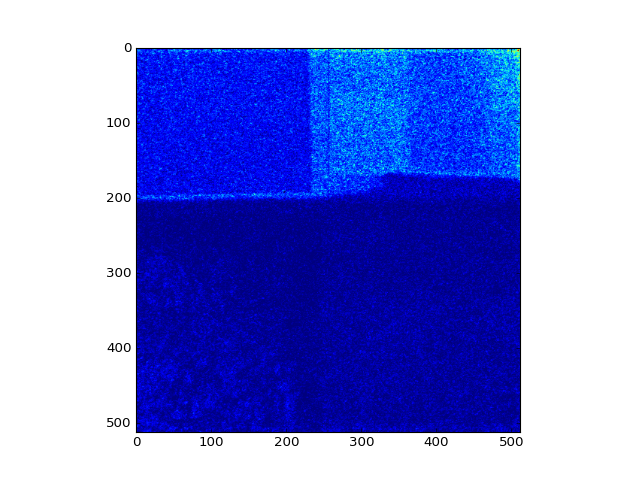

In [17]:
plt.figure()
plt.imshow(images[500])

## Select Range of Data of Interest

In [18]:
%matplotlib inline

[0, 1489]

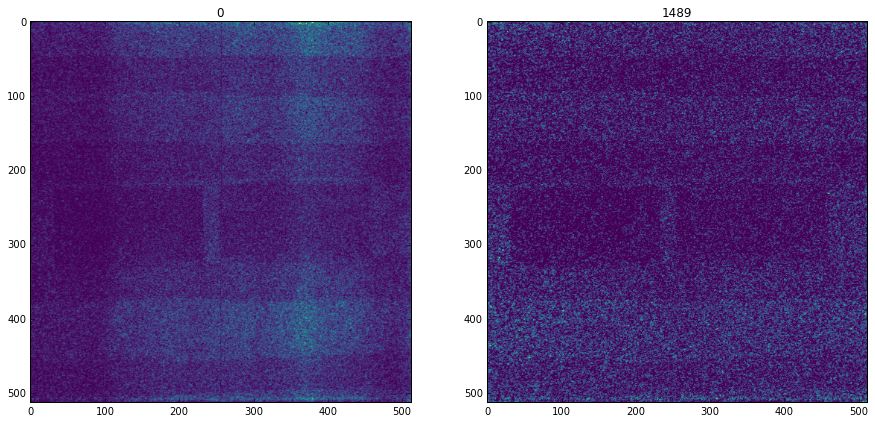

In [23]:
[height, width] = images[0].shape
nbr_images = len(images)
    
# select Sample region
def plot_images_to_keep(file_index_start, file_index_end):
    """displays the first image excluded and kept, and the last image kept and excluded"""
    
    _data1_in = images[file_index_start]
    
    _data2_in = images[file_index_end]

    fig3 = plt.figure(figsize=(15, 50))

    ax_img1_in = plt.subplot(121)
    ax_img1_in.imshow(_data1_in, cmap='viridis')
    ax_img1_in.set_title("%d" %(file_index_start))
    #ax_img1_in.set_title(list_fname[file_index_start - 1])

    ax_img2_in = plt.subplot(122)
    ax_img2_in.imshow(_data2_in, cmap='viridis')
    ax_img2_in.set_title("%d" %(file_index_end))
    #ax_img2_out.set_title("Last image excluded: %s" %list_fname[file_index_end])

    return [file_index_start, file_index_end]
    
file_range = interact(plot_images_to_keep,
               file_index_start = widgets.IntSlider(min=0, max=nbr_images, step=1, value=0, description='First Image to Keep'),
               file_index_end = widgets.IntSlider(min=0, max=nbr_images-1, step=1, value=nbr_images-1, description='Last Image to Keep'))


In [24]:
[file_index_start, file_index_end] = file_range.widget.result

In [25]:
images = images[file_index_start: file_index_end]

## Select Region of Interest 

In [28]:
sample_roi = { "top_sample": {"s_left": 33,
                             "s_right": 210,
                             "s_top": 52,
                             "s_bottom": 90}}

In [31]:
sample_name = "top_sample"
current_sample = sample_roi[sample_name]

[33, 210, 52, 90]

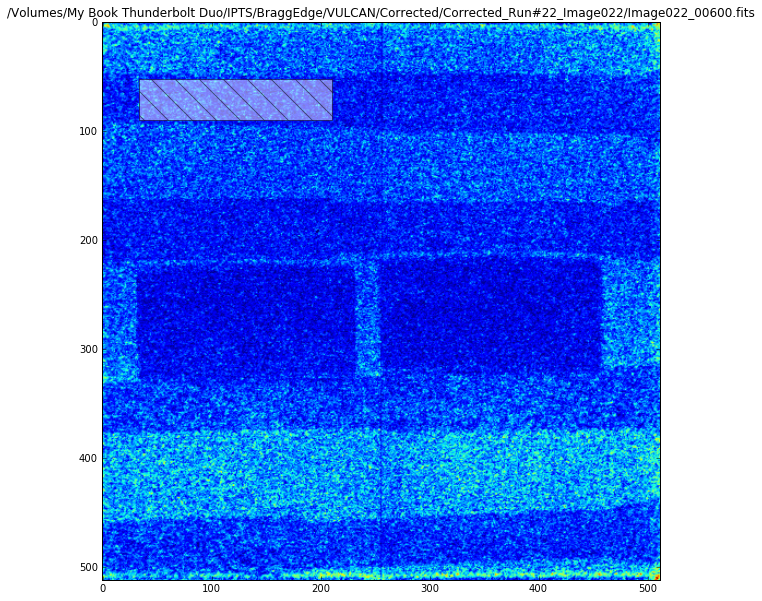

In [37]:
[height, width] = images[0].shape
    
# select Sample region
def plot_images_to_select_sample_regions(file_index, 
                                        s_left, s_right, s_top, s_bottom):

    _data = images[file_index]

    fig1 = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)

#    ax_img.imshow(_data, cmap='viridis')
    ax_img.imshow(_data)
    ax_img.set_title(list_fname[file_index])

    ax_img.add_patch(Rectangle((s_left, s_bottom), (s_right - s_left), (s_top - s_bottom), 
                              fill = True,
                               hatch = '\\',
                              alpha = 0.5,
                              facecolor = 'white'))

    return [s_left, s_right, s_top, s_bottom]


crop = interact(plot_images_to_select_sample_regions,
            file_index = widgets.IntSlider(min=0, max=nbr_images, step=1, value=600,
                                           description='Image Index'),
            s_left = widgets.IntSlider(min=0, max=width, step=1, 
                                       value=current_sample["s_left"], 
                                       description='left sample'),
            s_right = widgets.IntSlider(min=0, max=width, step=1, 
                                        value=current_sample["s_right"], 
                                        description='right sample'),
            s_top = widgets.IntSlider(min=0, max=height, step=1, 
                                      value=current_sample["s_top"], 
                                      description='top sample'),
            s_bottom = widgets.IntSlider(min=0, max=height, step=1, 
                                         value=current_sample["s_bottom"], 
                                         description='bottom sample')) 


In [54]:
# crop data

In [38]:
s_selection = crop.widget.result
print("Region selected:")
print()
print("-> Sample: ")
print("      left: %d" %s_selection[0])
print("     right: %d" %s_selection[1])
print("       top: %d" %s_selection[2])
print("    bottom: %d" %s_selection[3])

Region selected:

-> Sample: 
      left: 33
     right: 210
       top: 52
    bottom: 90


In [39]:
[s_left, s_right, s_top, s_bottom] = s_selection

cropped = []
for _image in images:
    _image_cropped = _image[s_top: s_bottom, s_left: s_right]
    cropped.append(_image_cropped)

1489


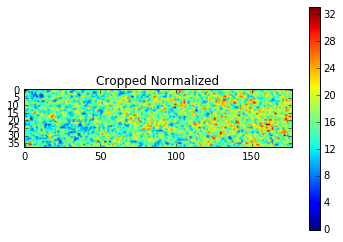

In [40]:
plt.figure()
plt.title("Cropped Normalized")
my_plot = plt.imshow(cropped[200])
print(len(cropped))
plt.colorbar(my_plot)

## Display Counts vs file index 

In [41]:
nbr_images = len(cropped)

total_counts = []
for _image in cropped:
    _sum = np.nansum(_image)
    total_counts.append(_sum)

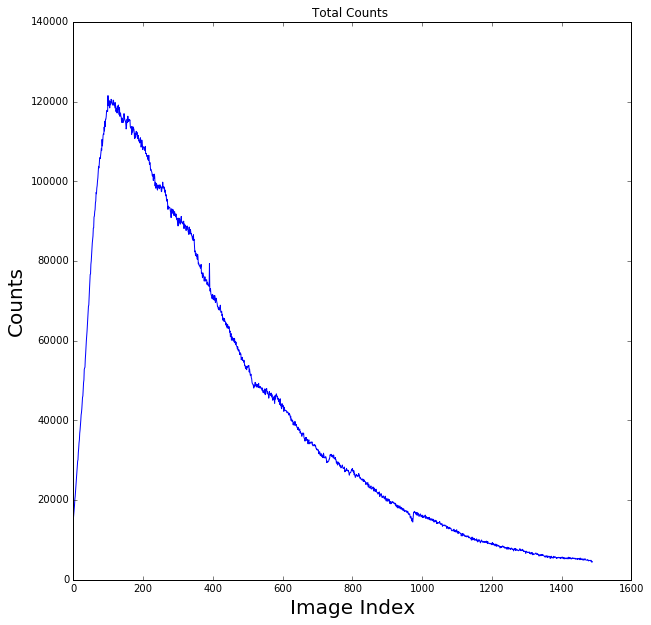

In [42]:
# display to check values
fig5 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(range(nbr_images), total_counts)

ax_img.set_xlabel("Image Index", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_title("Total Counts ")


### Select TOF file and define parameters required to calculate lambda equivalent spectra

In [44]:
import os
lambda_file = os.path.join(data_dir, 'lambda.txt')
print(lambda_file)

/Volumes/My Book Thunderbolt Duo/IPTS/BraggEdge/VULCAN/Corrected/Corrected_Run#22_Image022/lambda.txt


#### Load the lambda created in [lambda conversion](create_lambda_array.ipynb)

In [45]:
import sys

In [46]:
sys.path.append('/users/j35/git/braggedge/python')

In [47]:
import neutronbraggedge
from neutronbraggedge.experiment_handler import *

In [48]:
_lambda_handler = LambdaWavelength(filename = lambda_file )

In [50]:
lambda_array = _lambda_handler.lambda_array
lambda_range = lambda_array[file_index_start: file_index_end]
print(len(lambda_range))
print(len(images))

1489
1489


In [51]:
print(len(lambda_array))

1490


### Counts vs Lambda

     1. for entire images

In [52]:
lambda_np = np.array(lambda_range)
lambda_angstroms = lambda_np * 1.e10

In [67]:
trace = go.Scatter(x = lambda_angstroms,
                  y = total_counts,
                  mode = 'markers')
data = [trace]

layout = dict(title = 'Corrected Run#22 Image022',
              yaxis = dict(title='Counts'),
              xaxis = dict(title='Lambda (Angstroms)'))

figure = go.Figure(data = data, layout = layout)
iplot(figure)

### Calculate  for the material, the set of 'hkl' and display them on each Counts vs lambda plots

In [68]:
from neutronbraggedge.braggedge import BraggEdge

In [69]:
_handler = BraggEdge(material='inconel', number_of_bragg_edges=10, use_local_metadata_table=True)

In [70]:
_handler.hkl

{'inconel': [[1, 1, 1],
  [2, 0, 0],
  [2, 2, 0],
  [2, 2, 2],
  [3, 1, 1],
  [3, 3, 1],
  [3, 3, 3],
  [4, 0, 0],
  [4, 2, 0],
  [4, 2, 2]]}

In [71]:
_handler.bragg_edges

{'inconel': [4.1511484354734094,
  3.5950000000000002,
  2.5420488783656383,
  2.0755742177367047,
  2.1678665675141207,
  1.6494991265293391,
  1.3837161451578031,
  1.7975000000000001,
  1.6077328758223488,
  1.4676526042175877]}

### display bragg edges calculated on top of Total_counts vs lambda

In [76]:
hkl = _handler.hkl['inconel']
bragg_edges = _handler.bragg_edges['inconel']

In [77]:
_hkl_string = []
for _hkl in hkl:
    _hkl_s = ",".join(str(x) for x in _hkl)
    _hkl_string.append(_hkl_s)

In [79]:
#plot

trace1 = go.Scatter(
            x = lambda_angstroms,
            y = total_counts,
            mode = 'markers')

layout = go.Layout(
            title = "Total counts and Bragg Edges of Inconel",
            xaxis = {"title": "Lambda (Angstroms)"},
            yaxis = {"title": "Counts"}
            )

max_x = 6

for _index, _value in enumerate(_bragg_edges):
    if _value > max_x:
        continue
    bragg_line = {"type": "line",
                'x0': _value,
                'x1': _value,
                 'yref': "paper",
                 'y0': 0,
                 'y1': 1,
                 'line': {
                    'color': 'rgb(255, 0, 0)',
                    'width': 1
        }}
    layout.shapes.append(bragg_line)
    
    # add labels to plots
    _annot = dict(
                x=_value,
                y=1,
                text = _hkl_string[_index],
                yref="paper",
                font=dict(
                    family="Arial",
                    size=16,
                    color="rgb(150,50,50)"
                ),
                showarrow=True,
                arrowhead=3,
                ax=0,
                ay=-25)
                
    layout.annotations.append(_annot)
    
    

data = [trace1]
    
fig1 = go.Figure(data=data, layout=layout)
iplot(fig1)    

